# Pollen Identifier
The goal of this script is to: 
1) identify pollen from the slide background 
2) identify the shape of the pollen as either spheroidal or prolate

The data come from `https://www.paldat.org/`and were taken from species within the _Poales_ group that had light microscopy images (rather than electron microscope images)

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

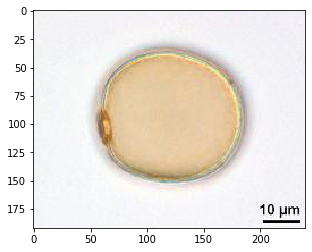

In [73]:
filename = '1_Alopecurus_pratensis.jpg'
img = cv2.imread(filename, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#plt.imshow(img)
trial = plt.imread('1_Alopecurus_pratensis.jpg')
plt.imshow(trial)
plt.show()

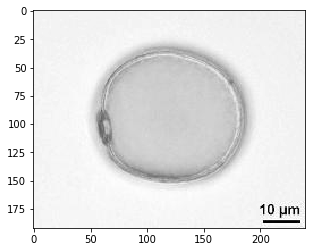

array([[243, 243, 243, ..., 240, 240, 240],
       [243, 243, 243, ..., 240, 240, 240],
       [243, 243, 243, ..., 240, 240, 240],
       ...,
       [246, 246, 246, ..., 250, 250, 247],
       [246, 246, 246, ..., 226, 250, 243],
       [246, 246, 246, ..., 254, 231, 250]], dtype=uint8)

In [74]:
plt.imshow(gray, cmap="gray")
plt.show()
gray

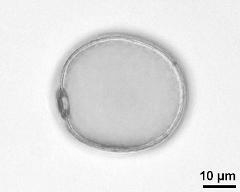

In [75]:
#Import an image
from numpy import asarray
image = Image.open(filename)
image
im = image.convert('L')
im
#data = asarray(im)
#data

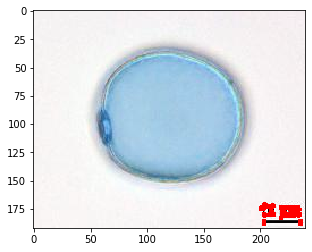

In [76]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(img)
plt.show()

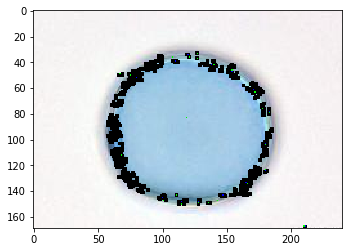

In [59]:
#This is further refinement of corners to the sub-pixel scale
# find Harris corners
#gray = np.float32(gray)
#dst = cv2.cornerHarris(gray,2,3,0.04)
#dst = cv2.dilate(dst,None)
#ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
#dst = np.uint8(dst)

# find centroids
#ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
#criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
#corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
#res = np.hstack((centroids,corners))
#res = np.int0(res)
#img[res[:,1],res[:,0]]=[0,0,255]
#img[res[:,3],res[:,2]] = [0,255,0]

#plt.imshow(img)
#plt.show()

In [72]:
dst

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.0468751e-02,  2.5000013e-03,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.0468751e-02,  1.5781250e-02,  1.5781250e-02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.0468751e-02,  1.5781250e-02,  1.5781250e-02],
       ...,
       [ 1.3320312e+00,  1.7861328e+00,  6.4033203e+00, ...,
         2.8857853e+01,  3.1895939e+01,  3.1895939e+01],
       [ 4.1312504e-01,  1.7861328e+00,  6.4033203e+00, ...,
         1.3142738e+02,  3.1570923e+02,  3.1570923e+02],
       [-2.2304684e-02,  1.7861328e+00,  6.4033203e+00, ...,
         1.3142738e+02,  3.1570923e+02,  3.1570923e+02]], dtype=float32)

The corner detection only works if the size bar is cropped out of the image.

In [77]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import argparse
import imutils

In [78]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [80]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to the input image")
#ap.add_argument("-w", "--width", type=float, required=True,
#	help="width of the error bar in micrometers")
#args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE -w WIDTH
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -w/--width


SystemExit: 2

In [81]:
#Load the image, convert it to grayscale, and blur
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7),0)

#perform edge detection, dilation + erosion to close gaps between object edges
edged=cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#sort the contours from left to right, initialize the pixels per metric calibration variable
(cnts, _) = contours.sort_contours(cnts)
pizelsPerMetric = None

SystemExit: 2

## Trying the VIS plantcv tutorial

In [1]:
import cv2
import numpy as np
import string
from plantcv import plantcv as pcv

ModuleNotFoundError: No module named 'plantcv'

## Trying opencv thresholding
`https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html`

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img1 = cv.imread('1_Alopecurus_pratensis.jpg')
img2 = cv.imread('2_Alopecurus_pratensis.jpg')

In [18]:
#check to see that the images are the same size
print(img1.shape)
print(img2.shape)

(192, 240, 3)
(192, 240, 3)


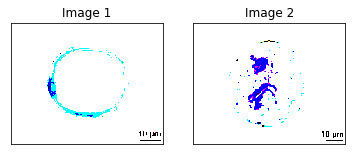

In [20]:
ret, thresh1 = cv.threshold(img1, 127,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img2, 127,255,cv.THRESH_BINARY)

titles = ["Image 1","Image 2"]
images = [thresh1, thresh2]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

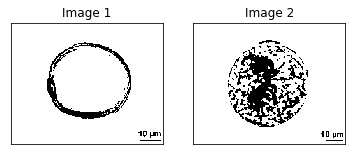

In [33]:
#Trying them as grayscale instead of color images
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

ret, thresh1 = cv.threshold(gray1, 180,230,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(gray2, 180,230,cv.THRESH_BINARY)

titles = ["Image 1","Image 2"]
images = [thresh1, thresh2]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

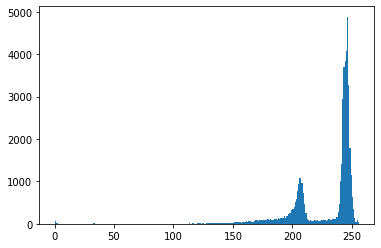

In [26]:
plt.hist(gray1.ravel(),256,[0,256]); plt.show()

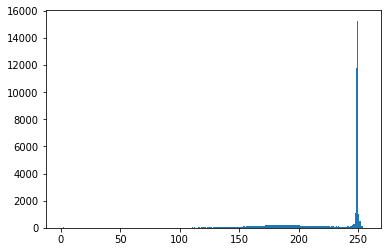

In [27]:
plt.hist(gray2.ravel(),256,[0,256]); plt.show()

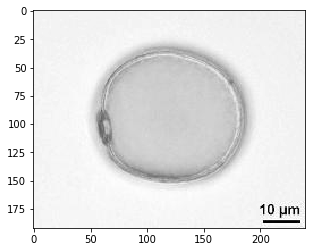

In [29]:
plt.imshow(gray1, cmap="gray")
plt.show()

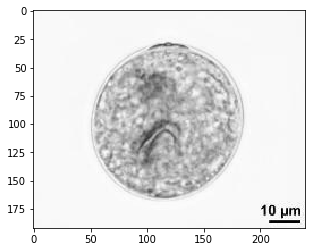

In [30]:
plt.imshow(gray2, cmap="gray")
plt.show()

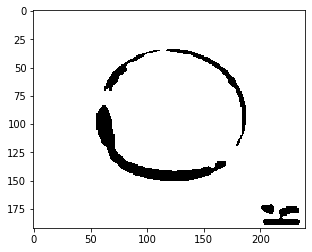

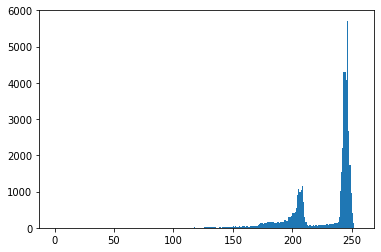

In [35]:
gray1 = cv.GaussianBlur(gray1, (7,7),0)
ret, thresh1 = cv.threshold(gray1, 180,230,cv.THRESH_BINARY)
plt.imshow(thresh1,'gray')
plt.show()
plt.hist(gray1.ravel(),256,[0,256]); plt.show()

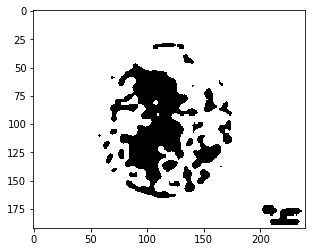

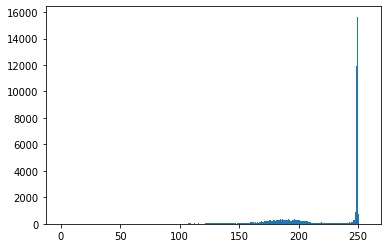

In [40]:
gray2 = cv.medianBlur(gray2, 5)
ret, thresh2 = cv.threshold(gray2, 180,230,cv.THRESH_BINARY)
plt.imshow(thresh2,'gray')
plt.show()
plt.hist(gray2.ravel(),256,[0,256]); plt.show()

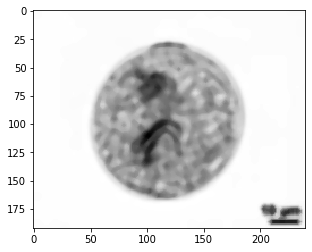

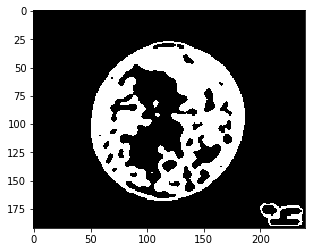

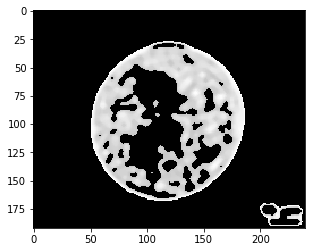

In [41]:
mask = cv.inRange(gray2, 180,230)
res = cv.bitwise_and(gray2,gray2, mask=mask)
plt.imshow(gray2,'gray');plt.show()
plt.imshow(mask, 'gray'); plt.show()
plt.imshow(res, 'gray'); plt.show()

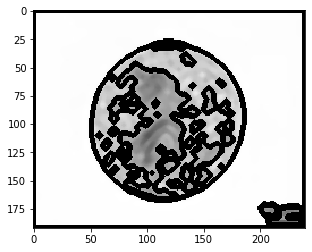

In [52]:
#finding the contours
#must be done after thresholding
contours2, hierarchy = cv.findContours(res, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(gray2, contours2, -1, (0,255,0),3)
plt.imshow(gray2,'gray');plt.show()
#cnt = contours2[1]
#cv.drawContours(gray2,[cnt],0,(0,255,0),3)

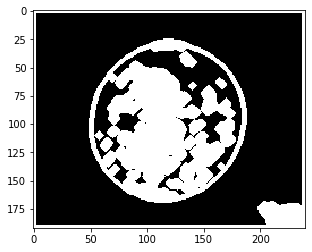

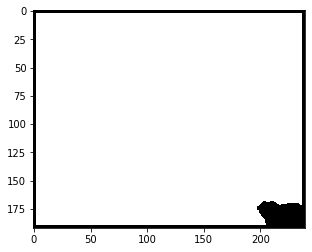

In [68]:
#advice from `https://www.learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/`
ret, thresh2 = cv.threshold(gray2, 180,230,cv.THRESH_BINARY_INV)
plt.imshow(thresh2,'gray');plt.show()

#Make a copy of the image to work with in floodfill
im_floodfill =thresh2.copy()
#mask used for floodfilling, needs to be 2 pixels larger than the image
h, w = thresh2.shape[:2]
mask2 = np.zeros((h+2,w+2),np.uint8)
#floodfill from point (0,0)
cv.floodFill(im_floodfill, mask2,(0,0),255)
#invert the floodfill image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
#combine the two images to get the foreground
im_out = thresh2.astype(np.int) | im_floodfill_inv.astype(np.int)
#display images
plt.imshow(im_out,'gray'); plt.show()


In [38]:



    # Read image
    #img, path, filename = pcv.readimage(filename='1_Alopecurus_pratensis.jpg')

    # Convert RGB to HSV and extract the saturation channel
    #s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
    hsv = cv.cvtColor(img2, cv.COLOR_BGR2HSV)

    # Threshold the saturation image
    s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

    # Median Blur
    s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)
    s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=5)

    # Convert RGB to LAB and extract the Blue channel
    b = pcv.rgb2gray_lab(gray_img=img, channel='b')

    # Threshold the blue image
    b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
    b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')

    # Fill small objects
    # b_fill = pcv.fill(b_thresh, 10)

    # Join the thresholded saturation and blue-yellow images
    bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)

    # Apply Mask (for VIS images, mask_color=white)
    masked = pcv.apply_mask(rgb_img=img, mask=bs, mask_color='white')

    # Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
    masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
    masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

    # Threshold the green-magenta and blue images
    maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
    maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
    maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')

    # Join the thresholded saturation and blue-yellow images (OR)
    ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
    ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

    # Fill small objects
    ab_fill = pcv.fill(bin_img=ab, size=200)

    # Apply mask (for VIS images, mask_color=white)
    masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')

    # Identify objects
    id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)

    # Define ROI
    roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=100, y=100, h=200, w=200)

    # Decide which objects to keep
    roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')

    # Object combine kept objects
    obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

    ############### Analysis ################

    #outfile=False
    #if args.writeimg == True:
     #   outfile = args.outdir + "/" + filename

    # Find shape properties, output shape image (optional)
    shape_imgs = pcv.analyze_object(img=img, obj=obj, mask=mask)

    # Shape properties relative to user boundary line (optional)
    boundary_img1 = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, line_position=1680)

    # Determine color properties: Histograms, Color Slices, output color analyzed histogram (optional)
    color_histogram = pcv.analyze_color(rgb_img=img, mask=kept_mask, hist_plot_type='all')

    # Pseudocolor the grayscale image
    pseudocolored_img = pcv.visualize.pseudocolor(gray_img=s, mask=kept_mask, cmap='jet')

    # Write shape and color data to results file
    pcv.print_results('results.txt')

if __name__ == '__main__':
    main()


ModuleNotFoundError: No module named 'plantcv'